# 1. Dataset Description

This dataset documents the test scores, school rankings, and application strengths of a series of college applicants, and correlates each with the probability that application is accepted to the school of their choice. Each of these features is provided as a continuous, qualitative numerical value, which means that we have the ability to process this data to review applications and learn what makes an application strong or not.

Every application in the dataset contains the following features:

• Graduate Record Examinations (‘GRE Score‘): A score (out of 340) on the GREs.

• Test of English as a Foreign Language (‘TOEFL Score‘): A score (out of 120) on the TOEFL.

• University Rating (‘University Rating‘): A rank from 1 to 5 (with 5 being the best) of the university this entry describes application to.

• Statement of Purpose (‘SOP‘): A rank from 1 to 5 (in increments of 0.5) of the Statement of Purpose provided as part of the application.

• Letter of Recommendation (‘LOR‘): A rank from 1 to 5 (in increments of 0.5) of the Letter of Recommendation provided as part of the application.

• Undergraduate GPA (‘CGPA‘): Undergraduate college GPA, scaled here to be between 0 and 10, with 10 being the highest.

• Research Experience (‘Research‘): A boolean ‘0‘ or ‘1‘ value indicating whether the applicant has research experience.

• Chance of Admission (‘Chance of Admit‘): The chance (as a decimal probability between 0 and 1) that the application described in the previous data points will be accepted by the target university.

# 2. Data Loading / Preprocessing

## 2.1 Loading

In [1]:
# importing pandas
import pandas as pd

In [2]:
# store the dataframe on df
df = pd.read_csv("data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# checking shape of entire dataframe
df.shape

(400, 9)

In [4]:
# checking is there any missing value exists or not
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
# checking datatypes for each attributes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

> No missing value exists in given dataset

## 2.2 Data Visualization

In [6]:
# importing necessary libraries
import seaborn as sns
import numpy as np

In [7]:
# show column names in dataframe
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# make column name as meaningful manner

df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [9]:
# updated column names
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
# droping Serial No. and Chance of Admit
df_new = df.drop(['Serial No.', 'Chance of Admit'], axis=1).copy()
df_new.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

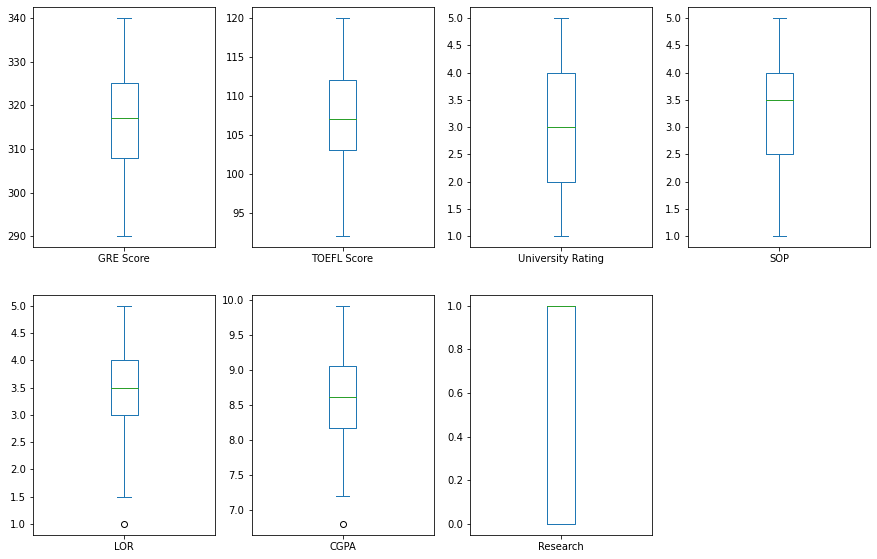

In [11]:
import matplotlib.pyplot as plt
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']

# making boxplot 
df_new[features].plot(kind='box',  figsize=(15, 15), subplots=True, layout=(3, 4))
plt.show()

> The above boxplot does not specifying detail information regarding each features.

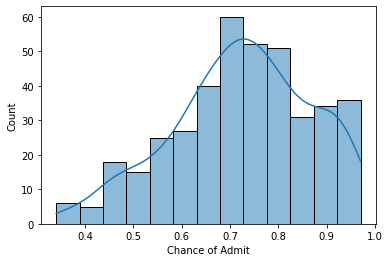

In [12]:
# Univariate analysis: Chance of Admit

sns.histplot(df['Chance of Admit'],kde=True)
plt.show()

> As we can see from above hsitogram there are majority of data points having Chance of Admit is greater than 0.7

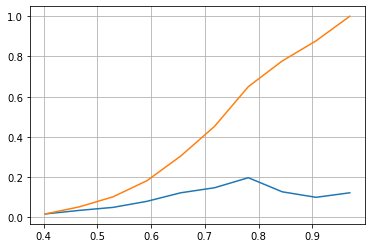

In [13]:
# Need for Cumulative Distribution Function (CDF)
#Plot CDF of Chance of Admit

counts, bin_edges = np.histogram(df['Chance of Admit'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.grid()
plt.show()

> Here,\
> around 88% data points having Chance of Admit < 0.9 \
> around 65% data points having Chance of Admit < 0.8 \
> around 40% data points having Chance of Admit < 0.7 \
> around 20% data points having Chance of Admit < 0.6

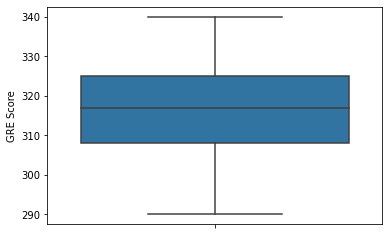

0 percentile value is 290
10 percentile value is 300
20 percentile value is 306
30 percentile value is 311
40 percentile value is 314
50 percentile value is 317
60 percentile value is 321
70 percentile value is 324
80 percentile value is 327
90 percentile value is 332
100 percentile value is  340


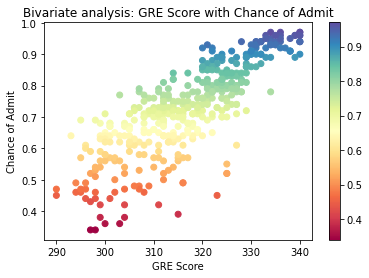

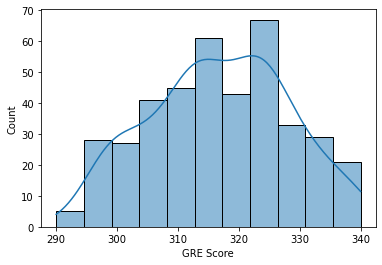

In [14]:
#Univariate analysis: GRE Score

sns.boxplot(y="GRE Score", data =df_new)
plt.show()

#calculating GRE Score values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df_new["GRE Score"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])


# Bivariate analysis: GRE Score with Chance of Admit
plt.scatter(df_new['GRE Score'], df['Chance of Admit'], c=df['Chance of Admit'], cmap='Spectral')
plt.colorbar()
plt.title('Bivariate analysis: GRE Score with Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()


sns.histplot(df_new['GRE Score'],kde=True)
plt.show()

> As GRE Score increases the Chance of Admit becomes high \
> The distribution of GRE Score is almost normal distribution

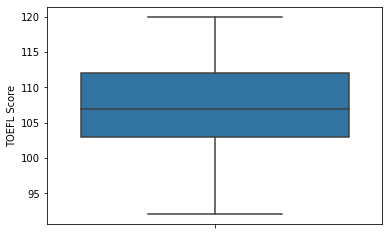

0 percentile value is 92
10 percentile value is 99
20 percentile value is 102
30 percentile value is 104
40 percentile value is 106
50 percentile value is 107
60 percentile value is 109
70 percentile value is 111
80 percentile value is 113
90 percentile value is 116
100 percentile value is  120


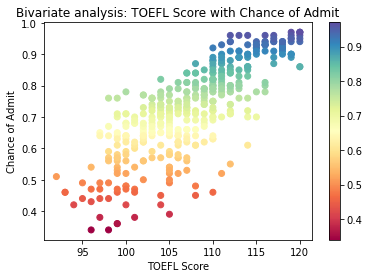

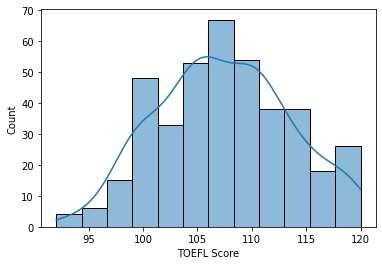

In [15]:
#Univariate analysis: TOEFL Score

sns.boxplot(y="TOEFL Score", data =df_new)
plt.show()

#calculating TOEFL Score values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df_new["TOEFL Score"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])


# Bivariate analysis: TOEFL with Chance of Admit
plt.scatter(df_new['TOEFL Score'], df['Chance of Admit'], c=df['Chance of Admit'], cmap='Spectral')
plt.colorbar()
plt.title('Bivariate analysis: TOEFL Score with Chance of Admit')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.show()

sns.histplot(df_new['TOEFL Score'],kde=True)
plt.show()

> As TOEFL Score increases the Chance of Admit becomes high \
> The distribution of TOEFL Score is almost normal distribution

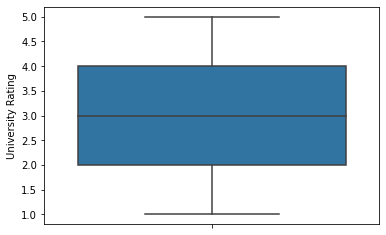

0 percentile value is 1
10 percentile value is 2
20 percentile value is 2
30 percentile value is 2
40 percentile value is 3
50 percentile value is 3
60 percentile value is 3
70 percentile value is 4
80 percentile value is 4
90 percentile value is 5
100 percentile value is  5


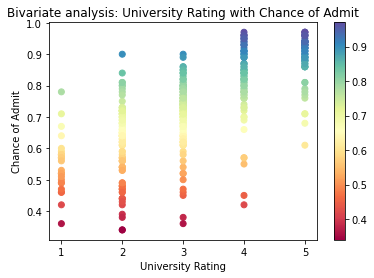

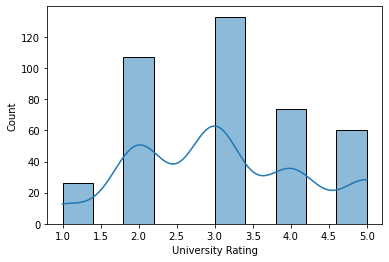

In [16]:
#Univariate analysis: University Rating

sns.boxplot(y="University Rating", data =df_new)
plt.show()

#calculating University Rating values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df_new["University Rating"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])



# Bivariate analysis: University Rating with Chance of Admit
plt.scatter(df_new['University Rating'], df['Chance of Admit'], c=df['Chance of Admit'], cmap='Spectral')
plt.colorbar()
plt.title('Bivariate analysis: University Rating with Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()



sns.histplot(df_new['University Rating'],kde=True)
plt.show()

> As University Rating increases the Chance of Admit becomes high \
> Given dataset has majority University Rating is 3.0

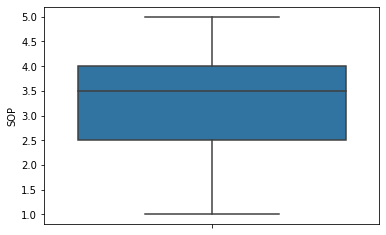

0 percentile value is 1.0
10 percentile value is 2.0
20 percentile value is 2.5
30 percentile value is 3.0
40 percentile value is 3.0
50 percentile value is 3.5
60 percentile value is 4.0
70 percentile value is 4.0
80 percentile value is 4.5
90 percentile value is 4.5
100 percentile value is  5.0


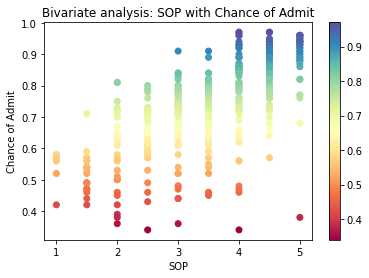

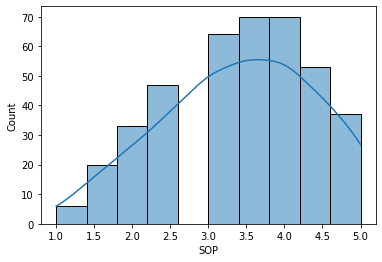

In [17]:
#Univariate analysis: SOP

sns.boxplot(y="SOP", data =df_new)
plt.show()

#calculating SOP values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df_new["SOP"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])



# Bivariate analysis: SOP with Chance of Admit
plt.scatter(df_new['SOP'], df['Chance of Admit'], c=df['Chance of Admit'], cmap='Spectral')
plt.colorbar()
plt.title('Bivariate analysis: SOP with Chance of Admit')
plt.xlabel('SOP')
plt.ylabel('Chance of Admit')
plt.show()



sns.histplot(df_new['SOP'],kde=True)
plt.show()

> As SOP increases the Chance of Admit becomes high \
> The distribution of SOP is slightly left skewed

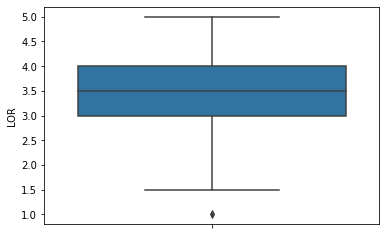

0 percentile value is 1.0
10 percentile value is 2.0
20 percentile value is 2.5
30 percentile value is 3.0
40 percentile value is 3.0
50 percentile value is 3.5
60 percentile value is 3.5
70 percentile value is 4.0
80 percentile value is 4.5
90 percentile value is 4.5
100 percentile value is  5.0


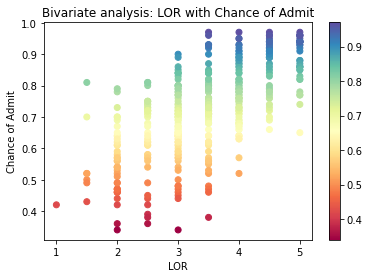

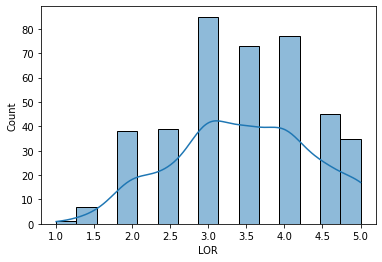

In [18]:
#Univariate analysis: LOR

sns.boxplot(y="LOR", data =df_new)
plt.show()

#calculating LOR values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df_new["LOR"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])



# Bivariate analysis: LOR with Chance of Admit
plt.scatter(df_new['LOR'], df['Chance of Admit'], c=df['Chance of Admit'], cmap='Spectral')
plt.colorbar()
plt.title('Bivariate analysis: LOR with Chance of Admit')
plt.xlabel('LOR')
plt.ylabel('Chance of Admit')
plt.show()



sns.histplot(df_new['LOR'],kde=True)
plt.show()

> As LOR increases the Chance of Admit becomes high \
> Given dataset has majority LOR is 3.0

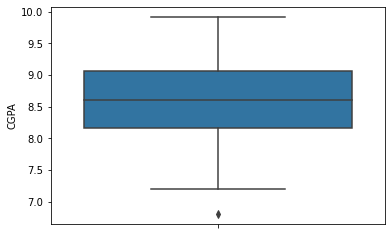

0 percentile value is 6.8
10 percentile value is 7.86
20 percentile value is 8.07
30 percentile value is 8.26
40 percentile value is 8.45
50 percentile value is 8.62
60 percentile value is 8.76
70 percentile value is 8.97
80 percentile value is 9.13
90 percentile value is 9.4
100 percentile value is  9.92


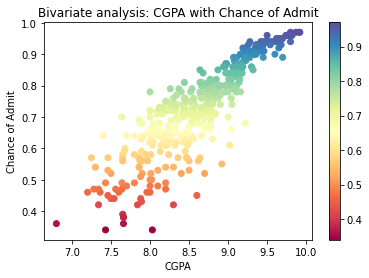

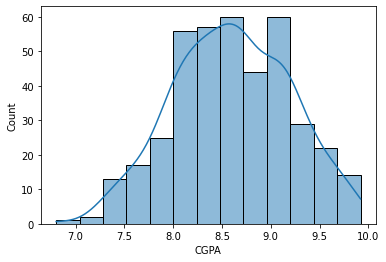

In [19]:
#Univariate analysis: CGPA

sns.boxplot(y="CGPA", data =df_new)
plt.show()

#calculating CGPA values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df_new["CGPA"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])


# Bivariate analysis: CGPA with Chance of Admit
plt.scatter(df_new['CGPA'], df['Chance of Admit'], c=df['Chance of Admit'], cmap='Spectral')
plt.colorbar()
plt.title('Bivariate analysis: CGPA with Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()



sns.histplot(df_new['CGPA'],kde=True)
plt.show()

> As CGPA increases the Chance of Admit becomes high \
> The distribution of CGPA Score is almost normal distribution

/home/prasun/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/prasun/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/prasun/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


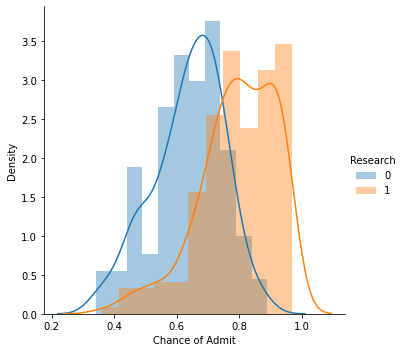

In [20]:
sns.FacetGrid(df, hue="Research", size=5) \
   .map(sns.distplot, "Chance of Admit") \
   .add_legend();
plt.show();


> Persons having Research having Chance of Admit is high, but there are few cases where persons don't have Research having Chance of Admit is high. So, Research column does not predict properly the Chance of Admit score.

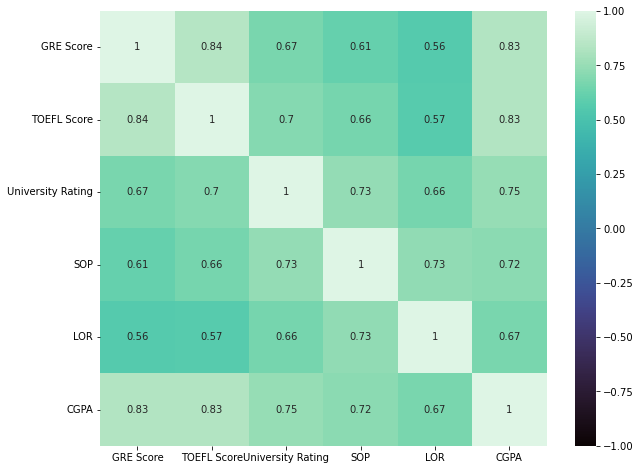

In [21]:
# Correlation matrix for all continuous features
df_continuous = df_new.drop(['Research'], axis=1).copy()
corr = df_continuous.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

> As from above correlation matrix we can ensures the following observations 
>
> GRE Score and TOEFL Score are highly correlated to each other.\
> GRE Score and CGPA are highly correlated to each other.\
> TOEFL Score and CGPA are highly correlated to each other. \
> GRE Score and LOR are relatively less correlated to each other.

## 2.3 Scaling

In [22]:
df_new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


> As we see from above feature we will apply StandardScaler on ['GRE Score', 'TOEFL Score', 'CGPA'] as other features are distrete in nature so no need of feature scaling on those features.

In [23]:
# perform scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
df_scaled = pd.DataFrame()
df_scaled = df_new.copy()
df_scaled[['GRE Score', 'TOEFL Score', 'CGPA']] = scaler.fit_transform(df_new[['GRE Score', 'TOEFL Score', 'CGPA']])

In [25]:
df_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,4,4.5,4.5,1.764818,1
1,0.627656,-0.067635,4,4.0,4.5,0.455151,1
2,-0.070467,-0.562528,3,3.0,3.5,-1.005631,1
3,0.453126,0.427257,3,3.5,2.5,0.119339,1
4,-0.244998,-0.727492,2,2.0,3.0,-0.653029,0


# 3 Feature Selection

> Let see which features are more relevent to predict Chance of Admit

## 3.1 Feature Selection-Information gain

In [26]:
from sklearn.feature_selection import mutual_info_regression

# determine the mutual information
mutual_info = mutual_info_regression(df_scaled, df['Chance of Admit'])
mutual_info

array([0.63058587, 0.59482825, 0.42315045, 0.36073342, 0.29073637,
       0.95767065, 0.22563464])

In [27]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_scaled.columns
mutual_info.sort_values(ascending=False)

CGPA                 0.957671
GRE Score            0.630586
TOEFL Score          0.594828
University Rating    0.423150
SOP                  0.360733
LOR                  0.290736
Research             0.225635
dtype: float64

<AxesSubplot:>

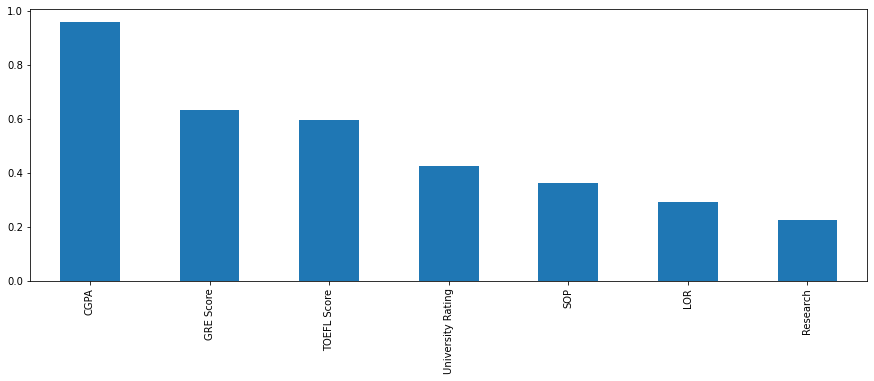

In [28]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

> As from above barplots we can see feature importance in decreasing order

In [29]:
# Creating a new dataset which exclude ['LOR', 'Research'] features from df_scaled

df_preproc = df_scaled.drop(['LOR', 'Research'], axis=1)
df_preproc.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA
0,1.762107,1.746971,4,4.5,1.764818
1,0.627656,-0.067635,4,4.0,0.455151
2,-0.070467,-0.562528,3,3.0,-1.005631
3,0.453126,0.427257,3,3.5,0.119339
4,-0.244998,-0.727492,2,2.0,-0.653029


# 4. Data Splitting

In [30]:
# perform train-test split on entire data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_preproc, df['Chance of Admit'], test_size=0.2, shuffle=True,random_state=84)

In [31]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((320, 5),(320,))
X_test  and y_test  : ((80, 5),(80,))


# 5. Modeling

## 5.1. Implementing LinearRegression

In [32]:
# import Linear Regression from Sklearn
from sklearn.linear_model import LinearRegression

In [33]:
# making instance of Linear Regression after fitting with X_train and y_train
reg = LinearRegression().fit(X_train, y_train)

In [34]:
# predict using X_train
y_pred_reg_tr = reg.predict(X_train)

In [35]:
# predict using X_test
y_pred_reg = reg.predict(X_test)

In [36]:
# Evaluating model
from sklearn.metrics import mean_squared_error

mse_reg = mean_squared_error(y_test, y_pred_reg)
mse_reg_tr = mean_squared_error(y_train, y_pred_reg_tr)

print("Train MSE: ",mse_reg_tr)
print("Test MSE:  ",mse_reg)

Train MSE:  0.004399435078236263
Test MSE:   0.0037589566680028643


## 5.2 Implementing SVM

In [37]:
# import SVR from sklearn.svm
from sklearn.svm import SVR

In [38]:
# making instance of SVR after fitting with X_train and y_train
svr = SVR(kernel = 'rbf').fit(X_train, y_train)

In [39]:
# predict using X_train
y_pred_svm_tr = svr.predict(X_train)

In [40]:
# predict using X_test
y_pred_svr = svr.predict(X_test)

In [41]:
# Evaluating model

mse_svr_tr = mean_squared_error(y_train, y_pred_svm_tr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Train MSE: ",mse_svr_tr)
print("Test MSE:  ",mse_svr)

Train MSE:  0.005486046773511851
Test MSE:   0.0065021064882161365


> As from above results we will stick with Linear Regression model as it gives less MSE as compare to SVM model, and this gets less overfit.

# 6. Creating CSV files of predictions chance of admission for the test set

In [42]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA
70,1.325780,1.746971,5,5.0,1.748028
357,-1.379448,-0.562528,2,3.5,-1.190328
52,1.500310,1.417042,4,4.0,-1.005631
146,-0.157732,-0.397564,3,2.0,-0.199682
107,1.849372,1.582006,4,3.5,1.445797


In [43]:
# making seperate dataframe for test data
df_test = pd.DataFrame()
df_test = X_test
df_test['Chance of Admit'] = y_test
df_test['predicted Chance of Admit'] = y_pred_reg

In [44]:
df_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Chance of Admit,predicted Chance of Admit
70,1.325780,1.746971,5,5.0,1.748028,0.94,0.942800
357,-1.379448,-0.562528,2,3.5,-1.190328,0.68,0.573815
52,1.500310,1.417042,4,4.0,-1.005631,0.78,0.710541
146,-0.157732,-0.397564,3,2.0,-0.199682,0.75,0.686423
107,1.849372,1.582006,4,3.5,1.445797,0.91,0.914750


In [45]:
# saving CSV file
df_test.to_csv("test_pred_Linear_Regression.csv", index= False)

# 7. Useing PCA

In [46]:
df_new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


## 7.1 Creating new dataset using PCA

In [47]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(df_new)

# pca_reduced will contain the 2-d projects of simple data

print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (400, 2)


In [48]:
import seaborn as sn
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, df['Chance of Admit'])).T

print(pca_data.shape)

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "Chance of Admit"))
print(pca_df.head(5))

(400, 3)
   1st_principal  2nd_principal  Chance of Admit
0     -22.874437       0.842160             0.92
1      -6.437340      -3.351222             0.76
2       2.221243      -2.744568             0.72
3      -5.744984       0.000912             0.80
4       4.594122      -2.912718             0.65


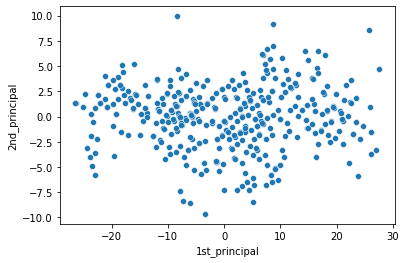

In [49]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",data=pca_df)
plt.show()

In [50]:
pca_df.shape

(400, 3)

## 7.2 Data Splitting

In [51]:
y = pca_df['Chance of Admit']
X = pca_df.drop(['Chance of Admit'], axis=1).copy()

In [52]:
# perform train-test split on entire data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=84)

In [53]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((320, 2),(320,))
X_test  and y_test  : ((80, 2),(80,))


## 7.3 Modeling

### 7.3.1 Implementing LinearRegression

In [54]:
# making instance of Linear Regression after fitting with X_train and y_train
reg_pca = LinearRegression().fit(X_train, y_train)

In [55]:
# predict using X_train
y_pred_reg_pca_tr = reg_pca.predict(X_train)

In [56]:
# predict using X_test
y_pred_reg_pca = reg_pca.predict(X_test)

In [57]:
# Evaluating model

mse_reg_pca_tr = mean_squared_error(y_train, y_pred_reg_pca_tr)
mse_reg_pca = mean_squared_error(y_test, y_pred_reg_pca)

print("Train MSE: ",mse_reg_pca_tr)
print("Test MSE: ",mse_reg_pca)

Train MSE:  0.0062597235766141636
Test MSE:  0.005625400044162924


### 7.3.2 Implementing SVM

In [58]:
# making instance of SVR after fitting with X_train and y_train
svr_pca = SVR(kernel = 'rbf').fit(X_train, y_train)

In [59]:
# predict using X_train
y_pred_svr_pca_tr = svr_pca.predict(X_train)

In [60]:
# predict using X_test
y_pred_svr_pca = svr_pca.predict(X_test)

In [61]:
# Evaluating model

mse_svr_pca_tr = mean_squared_error(y_train, y_pred_svr_pca_tr)
mse_svr_pca = mean_squared_error(y_test, y_pred_svr_pca)

print("Train MSE: ", mse_svr_pca_tr)
print("Test MSE: ", mse_svr_pca)

Train MSE:  0.006472247026485406
Test MSE:  0.006279278376696307


> As from above results we will stick with Linear Regression model as it gives less MSE as compare to SVM model, and and this gets less overfit.

### 7.3.3 Generate Scatter plot

<IPython.core.display.Javascript object>


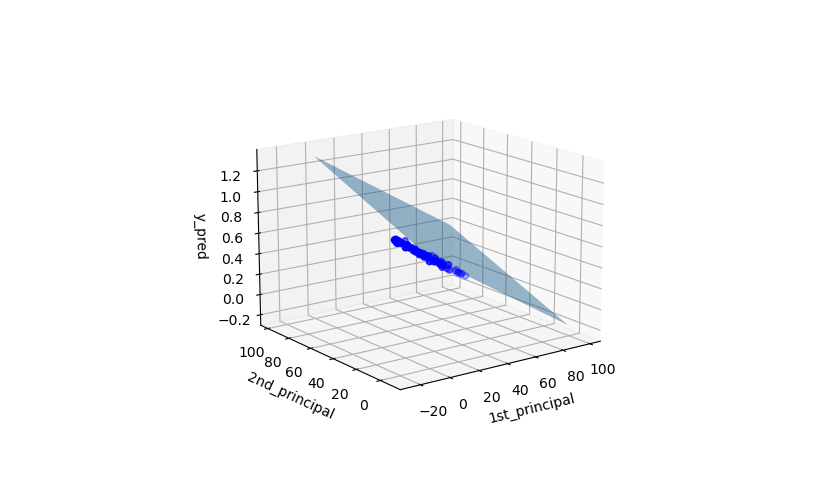

Equation: y = 0.72 + -0.01x1 + 0.01x2


In [62]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['1st_principal'], X_test['2nd_principal'], y_pred_reg_pca , marker='o', color='blue')
ax.set_xlabel("1st_principal")
ax.set_ylabel("2nd_principal")
ax.set_zlabel("y_pred")


coefs = reg_pca.coef_
intercept = reg_pca.intercept_
xs = np.tile(np.arange(100), (100,1))
ys = np.tile(np.arange(100), (100,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0], coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

### 7.3.4 Creating CSV files of predictions chance of admission for the test set

In [63]:
X_test.head()

,1st_principal,2nd_principal
70,-18.492083,3.155558
357,15.736004,3.769636
52,-19.170950,0.220202
146,2.787478,-1.506108
107,-23.286243,-0.564501


In [64]:
# making seperate dataframe for test data
df_test_pca = pd.DataFrame()
df_test_pca = X_test
df_test_pca['Chance of Admit'] = y_test
df_test_pca['predicted Chance of Admit'] = y_pred_reg_pca

In [65]:
df_test_pca.head()

,1st_principal,2nd_principal,Chance of Admit,predicted Chance of Admit
70,-18.492083,3.155558,0.94,0.911135
357,15.736004,3.769636,0.68,0.597558
52,-19.170950,0.220202,0.78,0.900438
146,2.787478,-1.506108,0.75,0.686999
107,-23.286243,-0.564501,0.91,0.934026


In [66]:
# saving CSV file
df_test_pca.to_csv("test_pred_PCA.csv", index= False)

# 8. Comparison

In [67]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model Name", "Train MSE", "Test MSE"]

x.add_row(["Linear Regression", 0.0043994, 0.0037589 ])
x.add_row(["SVM", 0.00548604, 0.00650210])
x.add_row(["PCA with Linear Regression", 0.00625972, 0.005625400])
x.add_row(["PCA with SVM", 0.00647224, 0.0062792])
print(x)

+----------------------------+------------+-----------+
|         Model Name         | Train MSE  |  Test MSE |
+----------------------------+------------+-----------+
|     Linear Regression      | 0.0043994  | 0.0037589 |
|            SVM             | 0.00548604 | 0.0065021 |
| PCA with Linear Regression | 0.00625972 | 0.0056254 |
|        PCA with SVM        | 0.00647224 | 0.0062792 |
+----------------------------+------------+-----------+


> As from above table we can ensure that Linear Regression model performs very well to predict Chance of Admit very well than other models.
>
> As we can see from Data Visualization part most of the features are linearly seperable with target feature i.e Chance of Admit, that is why Linear Regression performs very well.
>
> Using PCA we have reduced the dimension into 2 dimension and applied Linear Regression and SVM, as we can see from above table PCA with Linear Regression performs well than PCA with SVM.